In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

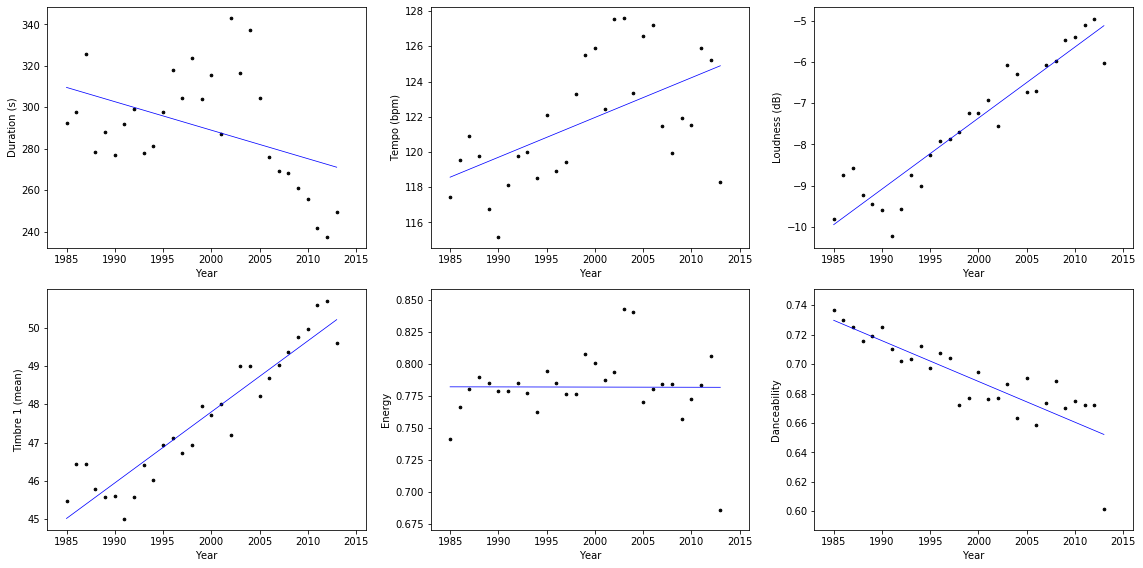

In [9]:
billboard = pd.read_csv('billboard_with_stats.csv')
songs = billboard[((billboard['year'] == 1985) & (billboard['month'] >= 1)) |
                               ((billboard['year'] >= 1986) & (billboard['year'] <= 2012)) | 
                               ((billboard['year'] == 2013) & (billboard['month'] <= 3))]
#songs.info()
years = songs['year'].unique()
songs = songs.groupby('year').mean()
#years = songs['year']
duration = songs['duration_ms'] / 1000
tempo = songs['tempo']
loudness = songs['loudness']
energy = songs['energy'] 
timbre_1_mean = songs['timbre_1_mean']
danceability = songs['danceability']
feature_dict = {'duration' : {'y' : duration, 'y_label' : 'Duration (s)', 'y_min' : 220, 'y_max' : 370},           
               'tempo' : {'y' : tempo, 'y_label' : 'Tempo (bpm)', 'y_min' : 115, 'y_max' : 125},
               'loudness' : {'y' : loudness, 'y_label' : 'Loudness (dB)', 'y_min' : -12, 'y_max' : -7},
               'timbre_1_mean' : {'y' : timbre_1_mean, 'y_label' : 'Timbre 1 (mean)', 'y_min' : 42.5, 'y_max' : 49},
               'energy' : {'y' : energy, 'y_label' : 'Energy', 'y_min' : 0.68, 'y_max' : 0.80},
               'danceability' : {'y' : danceability, 'y_label' : 'Danceability', 'y_min' : 0.61, 'y_max' : 0.74},
               }
plt.figure(figsize=(16, 8))
def plot(fts):
    x = years
    y = fts['y']
    x_label = 'Year'
    y_label = fts['y_label']
    y_min = fts['y_min']
    y_max = fts['y_max']
    x_min = 1983
    x_max = 2016
    
    plt.scatter(x, y, color='black', s=7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(x_min, x_max)
   # plt.ylim(y_min, y_max)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"b", linewidth=0.75)
    
plot_counter = 1
for fts in feature_dict: 
    plt.subplot(2, 3, plot_counter)
    plot(feature_dict[fts])
    plot_counter += 1

plt.tight_layout()
#plt.savefig('replicated_fig2.pdf', format='pdf')
plt.show()
# the line equation:


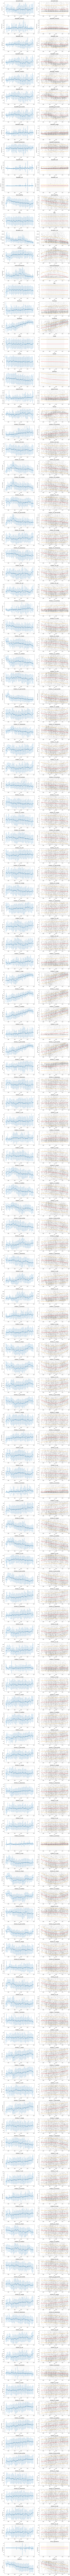

In [19]:
from sklearn import linear_model
import pandas as pd
songs = pd.read_csv('billboard_with_stats.csv')
years = songs['year'].unique()
songs_mean = songs.groupby('year').mean()
songs_std = songs.groupby('year').std()

def plot(key, mean, std):
    x = years
    y = mean
    err = std
    x_label = 'Year'
    plt.title(key, fontsize=18)
    #plt.scatter(x, y, color='black', s=7)
    plt.xlabel(x_label)
    plt.ylabel(key)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"black", linewidth=0.75)
    plt.errorbar(x, y, yerr=err, fmt='o')
    plt.axvspan(1985, 2013, facecolor='black', alpha=0.025)

def plot_bayes(key):
    years_ = songs['year'] - min(songs['year'])
    X = [[n, n**2] for n in years_]
    Y = [n for n in songs[key]]
    reg = linear_model.BayesianRidge()
    reg.fit(X, Y)
    #mean, std = reg.predict([[x, x**2] for x in years], True)
    years_ = years_+min(songs['year'])
    plt.title(key, fontsize=18)
    plt.xlabel("Year")
    plt.ylabel(key)
    plt.scatter(years_, Y, s=1.2, color='black')
    
    years_ = years_.unique() - min(songs['year'])
    years_.sort()
    mean, std = reg.predict([[x, x**2] for x in years_], True)
    years_ = years_+min(songs['year'])
    plt.plot(years_, mean, '-', color="red")
    plt.plot(years_, mean-std, '-', color='orange')
    plt.plot(years_, mean+std, '-', color='orange')
    plt.axvspan(1985, 2013, facecolor='black', alpha=0.025)
    
num_fig_rows = len(songs_mean.keys())
plt.figure(figsize=(16, 4*num_fig_rows))
plot_counter = 1
for key in songs_mean.keys():
    plt.subplot(num_fig_rows, 2, plot_counter)
    plot(key, songs_mean[key], songs_std[key])
    plot_counter += 1
    x1, x2, y1, y2 = plt.axis()
    plt.subplot(num_fig_rows, 2, plot_counter)
    plot_bayes(key)
    plt.axis((x1, x2, y1, y2))
    print("%s/%s" % (str(plot_counter).rjust(len(songs_mean.keys())), len(songs_mean.keys())*2), end='\r')
    plot_counter += 1

plt.tight_layout()
plt.savefig('massive_plot_with_bayes.pdf', format='pdf')
plt.show()

In [ ]:
def findSongWithMaxAttribute(attribute, year=0):
    if year != 0:
        song = songs.iloc[songs.groupby("year")[attribute].idxmax()[year]]
    else:
        song = songs.iloc[songs[attribute].idxmax()]
    return "Song with max %s: %s \nTitle: %s, By: %s, Date: %s/%s/%s" % (attribute, str(song[attribute]), song["title"], song["artist"], song["year"], song["month"], song["day"])
def findSongsWithMaxAttribute(n, attribute, year):
    return songs.groupby("year").get_group(year).nlargest(n, attribute)[["year","title","artist",attribute]]

def findSongsWithMinAttribute(n, attribute, year):
    return songs.groupby("year").get_group(year).nsmallest(n, attribute)[["year","title","artist",attribute]]

def findSongWithMinAttribute(attribute, year=0):
    if year != 0:
        song = songs.iloc[songs.groupby("year")[attribute].idxmin()[year]]
    else:
        song = songs.iloc[songs[attribute].idxmin()]
    return "Song with min %s: %s \nTitle: %s, By: %s, Date: %s/%s/%s" % (attribute, str(song[attribute]), song["title"], song["artist"], song["year"], song["month"], song["day"])

#print(songs.iloc[happiest_song])

#print(songs.iloc[saddest_song])

#print(songs.groupby("year").count())
#print(findSongsWithMaxAttribute(3, "energy", 2019))
#print(findSongsWithMinAttribute(3, "danceability", 1976))
print(findSongWithMinAttribute("danceability"))
print(findSongWithMaxAttribute("danceability"))

    


In [ ]:
from sklearn import linear_model
#songs_ = songs[songs['year'] == 1976]
years = songs['year'] - min(songs['year'])
X = [[n] for n in years]
X = [X[0], X[200], X[400], X[600], X[800]]
#X = [[n, n**2] for n in years]
Y = [n for n in songs['tempo']]
Y = [Y[0], Y[200], Y[400], Y[600], Y[800]]
plt.scatter(X, Y, s=1)
#reg = linear_model.BayesianRidge(lambda_1 = 1000, lambda_2 = 1000, alpha_1 = 1000, alpha_2 = 1000)
#reg = linear_model.BayesianRidge(lambda_1 = 1000, lambda_2 = 1000, alpha_1 = 1000, alpha_2 = 1000)
#reg = linear_model.BayesianRidge(lambda_1 = 1000, lambda_2 = 1000, alpha_1 = 1000, alpha_2 = 1000)
reg = linear_model.BayesianRidge()
reg.fit(X, Y)

#years = np.arange(-1.0, 3.0, 0.01)
mean, std = reg.predict([[x] for x in years], True)
#mean, std = reg.predict([[x, x**2] for x in years], True)
plt.plot(years, mean)
plt.plot(years, mean-std, '+')
plt.plot(years, mean+std, '+')
#print(mean)
print(std[100])
print(min(std))